# An Introduction to Playing with XV Data
## Made By Ronan Smith

This is a very simple introduction to playing with XV Data, there are many many many more and better ways of looking at the data - all this notebook aims to do is reproduce the same analysis available in the PDF reports from 4D medical.

Once we understand that, going beyond is easier.

### Step 1: Load some data

In [1]:
# load some libraries

import numpy as np
from matplotlib import pyplot as plt
import os
import scipy

import matplotlib.cm as cmx
import matplotlib

In [2]:
# path to location
baseline_folder = r"T:\Imaging\SAHMRI\Permetium\CF - Sterile Beads\Output\Specific Ventilation\Baseline\All data\\"

files = os.listdir(baseline_folder)

# load a test dataset

data = np.loadtxt(baseline_folder + files[0], skiprows = 1, delimiter = ',')

print(data.shape)

# the data is in the format [value, X, Y, Z]

print(data)

(4932, 4)
[[ 0.0214245 -0.193837  -4.84594   -6.91354  ]
 [ 0.0880791 -2.26144   -4.32904   -6.91354  ]
 [ 0.0645537 -1.74454   -4.32904   -6.91354  ]
 ...
 [ 0.130381  -6.39664   -6.39664   10.1442   ]
 [ 0.0890752 -9.49804   -3.81214   10.1442   ]
 [ 0.        -6.39664   -6.91354   10.6611   ]]


As you should be able to see, the CSV files provided contain specific ventillation values for points in the lung, and X Y Z coordinates showing where that point is. 

### Step 2: Plotting and Looking

We can plot these on a 3D scatter plot, and use a colormap to give each point a colour. Taking slices through this volume would produce the images seen in the PDF reports from 4D medical. 
Note that the reports 4D medical produce use interpolation/smoothing to make the images appear less pixellated, and also use CT data to add in bones etc for context. That data is available in DICOM format for most experiments - ask Ronan if you would like access as the files are large.

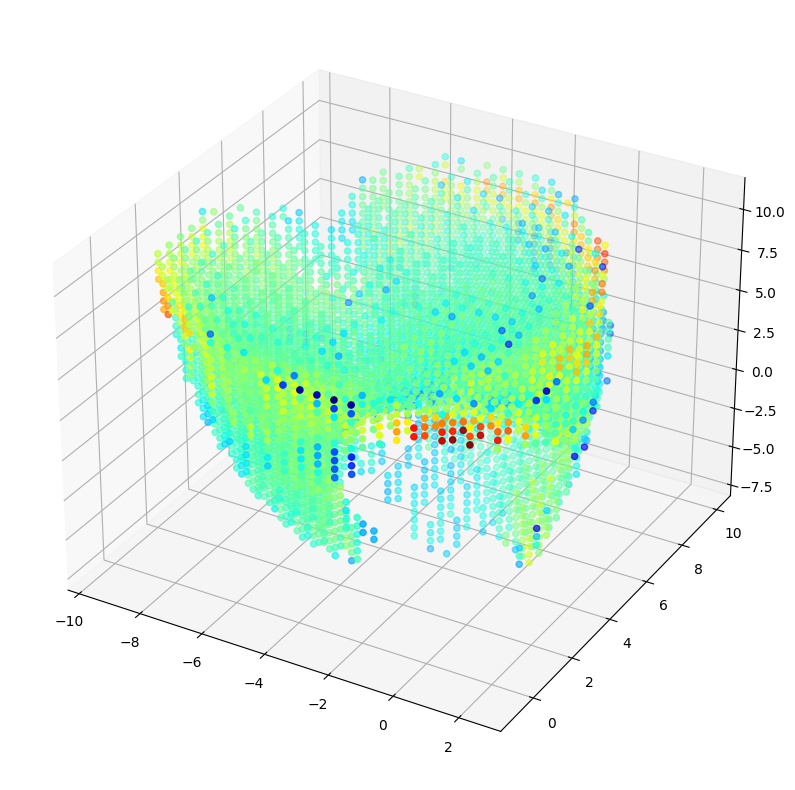

In [3]:
fig = plt.figure(figsize = (10,10))

# colours stuff
cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=min(data[:,0]), vmax=max(data[:,0]))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,1], -data[:,2], data[:,3], c=scalarMap.to_rgba(data[:,0]))

# scalarMap.set_array(data[:,0])
# fig.colorbar(scalarMap)

This image is interesting, but contains a lot of data. This makes quickly interpreting it challenging

### Step 3: Histograms

One way to reduce the data is to plot a histogram of the specific ventiallation values. This can be looked at, and the shape can tell us a lot about what is going on. Normal (healthy) lungs generally follow a normal(ish) distributions, with deviations from this indicating something worth investigating is occurring. 


(array([  2.,   1.,   2.,   0.,   2.,   0.,   1.,   1.,   5.,   5.,   6.,
          7.,  11.,  12.,  31.,  48.,  86., 156., 254., 402., 623., 889.,
        687., 517., 332., 221., 169., 112.,  80.,  62.,  55.,  34.,  26.,
         15.,  16.,  12.,  13.,   8.,   6.,   4.,   4.,   3.,   2.,   1.,
          4.,   0.,   1.,   1.,   1.,   2.]),
 array([-0.411918  , -0.38395712, -0.35599624, -0.32803536, -0.30007448,
        -0.2721136 , -0.24415272, -0.21619184, -0.18823096, -0.16027008,
        -0.1323092 , -0.10434832, -0.07638744, -0.04842656, -0.02046568,
         0.0074952 ,  0.03545608,  0.06341696,  0.09137784,  0.11933872,
         0.1472996 ,  0.17526048,  0.20322136,  0.23118224,  0.25914312,
         0.287104  ,  0.31506488,  0.34302576,  0.37098664,  0.39894752,
         0.4269084 ,  0.45486928,  0.48283016,  0.51079104,  0.53875192,
         0.5667128 ,  0.59467368,  0.62263456,  0.65059544,  0.67855632,
         0.7065172 ,  0.73447808,  0.76243896,  0.79039984,  0.81836072,
 

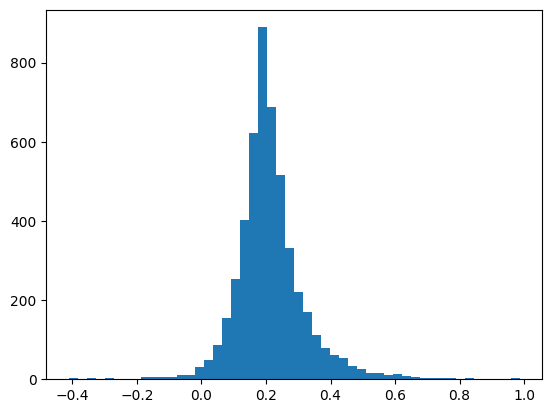

In [4]:
plt.hist(data[:,0], bins = 50)

These histograms can tell us a lot about the data, and we can fit curves for quantatitive analysis, but we can also get a few simple paramaters from the specific ventiallation data for easy comparison.

### Step 4: Key Values

These values can all be found at the top of the 4D medical PDF reports, here is how they are defined. Note that what 'healthy' or 'normal' values are is not fully known and may change with age and species. 

In [5]:
def mean_specific_ventillation(data):
    '''
    Self Explanatory
    '''
    return np.mean(data)

def volume_defect_percentage(data):
    '''
    The percentage of voxels below 60% of the mean
    '''
    mean = mean_specific_ventillation(data)
    sixty = mean * 0.6
    
    defect = np.count_nonzero(data < sixty)
    total = len(data)
    
    return (defect/total) * 100

def ventillation_heterogeneity(data):
    '''
    Defined as interquartile range divided by the mean
    '''
    iqr = scipy.stats.iqr(data, nan_policy='omit')
    mean = mean_specific_ventillation(data)
    
    return iqr/mean

print('Mean Specific Ventillation is: {}'.format(mean_specific_ventillation(data[:,0])))
print('Volume Defect Percentage is: {}'.format(volume_defect_percentage(data[:,0])))
print('Ventillation Heterogeneity is: {}'.format(ventillation_heterogeneity(data[:,0])))
    


Mean Specific Ventillation is: 0.21454199444951338
Volume Defect Percentage is: 15.085158150851582
Ventillation Heterogeneity is: 0.4557883888928385


### Step 5: Next Steps

All of these things are useful for looking at data, but we really want to go further. 

Through inspection of the images and hypotheses about how the lungs are expected to change in the study being done, a custom analysis pipeline based around the principles here can be built. For example, the lung volume can be split into sub volumes if something is expected or seen to have an effect in only part of a lung. Histograms and values can then be found for part of the lung. 

The richest data is within the volumetric data, reducing it to histograms or numbers for easy interpretation throws away a lot of the interest - exploring new ways of analysing the volumetric data is key. 